In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p_vals = np.linspace(0.0, 1.0, 1000)

In [3]:
def L(p, N, D):
    return p**D * (1-p)**(N-D)

In [4]:
def LR(N, D, p_vals, p_hat=0.4):
    L_ratios = np.array([L(i, N, D) / L(p_hat, N, D) for i in p_vals])
    return L_ratios

In [5]:
def find_intersections(p_vals, L_ratios, lam_crit=0.2585):
    # Find the indices where the curve crosses lam_crit
    indices = np.where(np.diff(np.sign(L_ratios - lam_crit)))[0]
    return indices

In [12]:
def plot_LR_curve(N, D, p_vals, lam_crit=0.2585):
    
    L_ratios = LR(N, D, p_vals)
    ic = find_intersections(p_vals, L_ratios)
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(p_vals, L_ratios, zorder=3, color='k')
    ax.grid(True, alpha=0.3, zorder=1)
    ax.axhline(y=lam_crit, linestyle='--', linewidth=0.9, color='k')
    ax.vlines(x=p_vals[ic[0]], ymin=0, ymax=lam_crit, linewidth=0.9, color='k')
    ax.vlines(x=p_vals[ic[1]], ymin=0, ymax=lam_crit, linewidth=0.9, color='k')
    ax.set_xlabel('Risk (p)')
    ax.set_ylabel('Likelihood ratio');
    
    likelihood_interval_90 = p_vals[ic[0]:ic[1]+1]
    print(f'90% likelihood interval: [{likelihood_interval_90[0]:.3f}, {likelihood_interval_90[-1]:.3f}]')

90% likelihood interval: [0.177, 0.655]


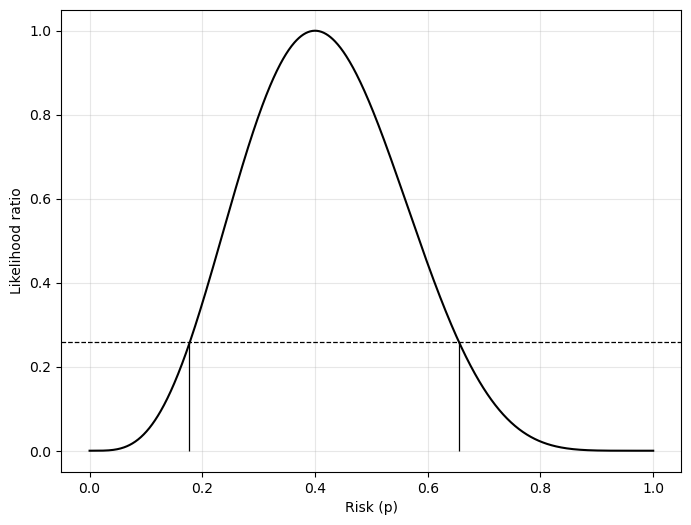

In [13]:
plot_LR_curve(N=10, D=4, p_vals=p_vals)